# 均值偏移(Mean-Shift)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm

# MNIST Dataset

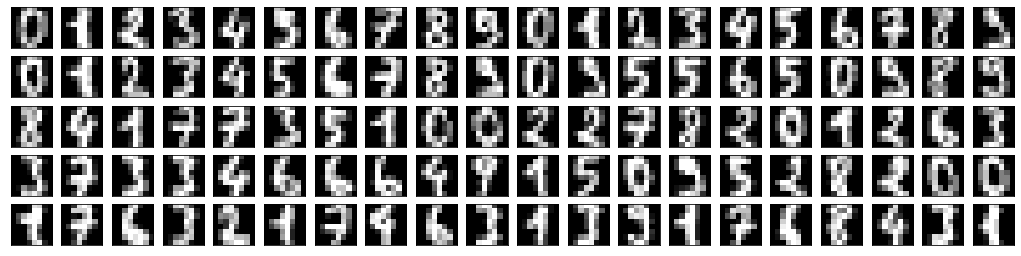

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# Get Seed

In [4]:
def get_seed(X,y,k):
    N=X.shape[0]
    init_index=np.zeros(k)
    for i in range(k):
        index=np.random.randint(0,N,1)
        while(y[index]!=i):
            index=np.random.randint(0,N,1)
        init_index[i]=index
    return X[init_index.astype(int)]

# Radius Nearest Neighbor

In [5]:
from scipy.spatial.distance import cdist
def RadiusNN(X,point,bandwidth):
    N,M=X.shape
    sqdist=cdist(X,point.reshape(1,M),metric='sqeuclidean')
    sqdist[sqdist>bandwidth]=0
    return sqdist.ravel()

# Mean-Shift

In [6]:
N,M=X.shape
bandwidth=2.5
seed_size=10
max_iter=50
seed=get_seed(X,y,seed_size)
centre=np.zeros((seed_size,M))
for i in range(seed_size):
    mean_shift=seed[i]
    for t in range(max_iter):
        pre_mean_shift=mean_shift.copy()
        neighbors_sqdist=RadiusNN(X,mean_shift,bandwidth)
        neighbors_index=(neighbors_sqdist!=0)
        kernel=np.exp(-0.1*neighbors_sqdist[neighbors_index])
        mean_shift=np.sum(kernel[:,None]*X[neighbors_index,:],axis=0)/np.sum(kernel)
        if(np.sum(mean_shift-pre_mean_shift)**2<1e-6):
            centre[i]=mean_shift
            print("In",t,"iteration, the computation for seed",i,"is convergent")
            break
centre_dist=cdist(X,centre,metric='sqeuclidean')
labels=np.argmin(centre_dist,axis=1)

In 5 iteration, the computation for seed 0 is convergent
In 7 iteration, the computation for seed 1 is convergent
In 10 iteration, the computation for seed 2 is convergent
In 7 iteration, the computation for seed 3 is convergent
In 14 iteration, the computation for seed 4 is convergent
In 6 iteration, the computation for seed 5 is convergent
In 4 iteration, the computation for seed 6 is convergent


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In 5 iteration, the computation for seed 8 is convergent
In 16 iteration, the computation for seed 9 is convergent


# Compute Error Rate

In [7]:
print("the mean-shift clustering error rate:",np.sum(labels!=y)/N)

the mean-shift clustering error rate: 0.25097384529771843


# Plot

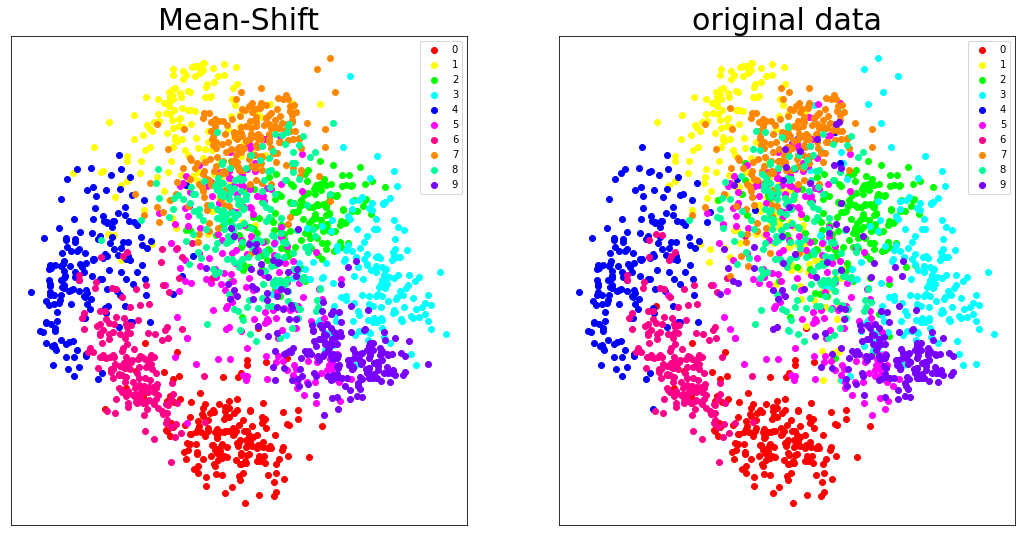

In [19]:
X_embedded=PCA(X,2,N)
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,9)
fig , ax = plt.subplots()
plt.subplot(1, 2, 1)
for i in range(0,10):
    BOOL=(labels==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
plt.title("Mean-Shift",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.subplot(1, 2, 2)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
plt.title("original data",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.show()